In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [4]:
df=pd.read_csv('car data.csv')

In [5]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
df.shape

(301, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
# checking for categorical data(fuel_type,seller_type,transmission)
print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


#### Encoding categorical data to numeric data for ML model to understand it better

In [13]:
# encoding Fuel_type data column
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

#encoding Seller_Type data column
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

#encodin Transmission data column
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

df.head()

C:\Users\intel\AppData\Local\Temp\ipykernel_1848\3986594077.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
C:\Users\intel\AppData\Local\Temp\ipykernel_1848\3986594077.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


#### Splitting the data into training and test data

In [18]:
X=df.drop(['Selling_Price','Car_Name'],axis=1)
y=df['Selling_Price']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=2)

### Model Training

#### 1. Linear Regression

In [21]:
linear_reg_model=LinearRegression()

linear_reg_model.fit(X_train,y_train)

#### Model Evaluation

In [23]:
# predicting using the model
train_data_predict=linear_reg_model.predict(X_train)

In [24]:
# R squared error
error_score=metrics.r2_score(y_train,train_data_predict)

In [25]:
error_score

0.8799451660493708

#### Visualize the actual Price and Predicted Price

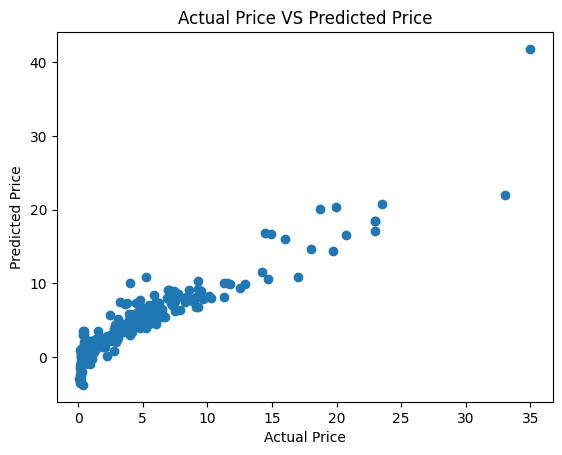

In [29]:
plt.scatter(y_train,train_data_predict)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price VS Predicted Price")
plt.show()

In [30]:
# predicting test data using the model
test_data_predict=linear_reg_model.predict(X_test)

In [31]:
# R squared error
error_score=metrics.r2_score(y_test,test_data_predict)
error_score

0.8365766715026374

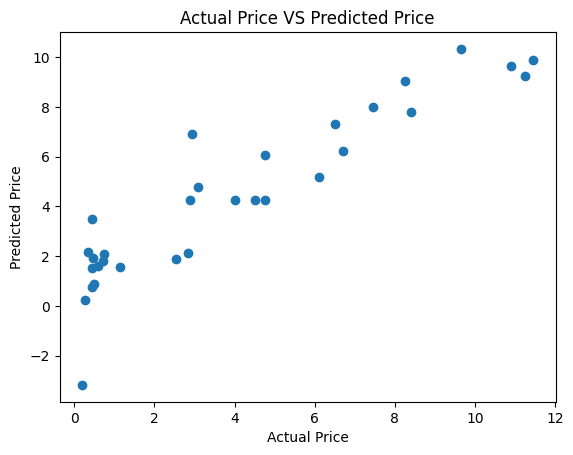

In [32]:
plt.scatter(y_test,test_data_predict)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price VS Predicted Price")
plt.show()

#### 2. Lasso Regression

In [33]:
lasso_reg_model=Lasso()

In [34]:
lasso_reg_model.fit(X_train,y_train)

Lasso()

In [35]:
# predicting using the model
train_data_predict=lasso_reg_model.predict(X_train)

In [36]:
# R squared error
error_score=metrics.r2_score(y_train,train_data_predict)

In [37]:
error_score

0.8427856123435794

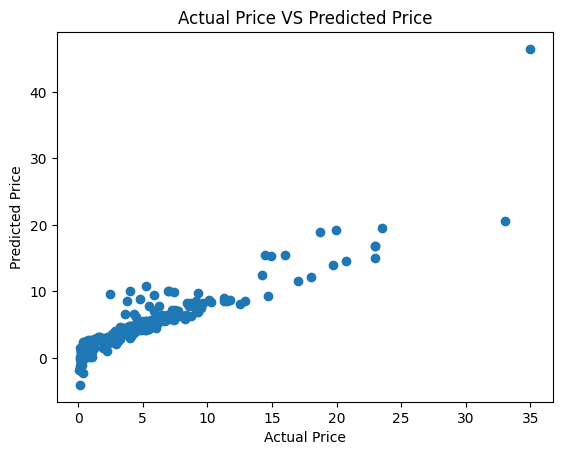

In [38]:
plt.scatter(y_train,train_data_predict)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price VS Predicted Price")
plt.show()

In [39]:
# predicting test data using the model
test_data_predict=lasso_reg_model.predict(X_test)

In [40]:
# R squared error
error_score=metrics.r2_score(y_test,test_data_predict)
error_score

0.8709167941173195

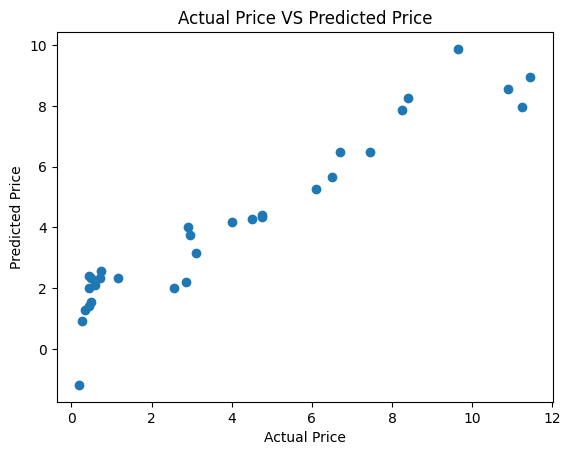

In [41]:
plt.scatter(y_test,test_data_predict)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price VS Predicted Price")
plt.show()